# 第 5 章 Pandas数据载入与预处理

对于数据分析而言，数据大部分来源于外部数据，如常用的CSV文件、Excel文件和数据库文件等。  
Pandas库将外部数据转换为DataFrame数据格式，处理完成后再存储到相应的外部文件中。

## 5.1 数据载入
### 5.1.1 读/写文本文件


文本文件是一种由若干行字符构成的计算机文件，它是一种典型的顺序文件。 

txt文件：是Windows操作系统上附带的一种文本格式，文件以.txt为后缀。 

CSV文件：是Comma-Separated Values的缩写，用半角逗号（’,’）作为字段值的分隔符。 


**1.文本文件读取**  

Pandas中使用read_table来读取文本文件：   
pandas.read_table(filepath_or_buffer, sep=’\t’, header=’infer’, names=None, index_col=None, dtype=None, engine=None, nrows=None) 

Pandas中使用read_csv函数来读取CSV文件：  
pandas.read_csv(filepath_or_buffer, sep=’，’, header=’infer’, names=None, index_col=None, dtype=None, engine=None, nrows=None) 


In [2]:
%%html
<img src = "tables\table5_1.bmp", width=600, height=100>

In [4]:
import pandas as pd
import numpy as np

【例5-1】使用read_csv函数读取CSV文件。

In [5]:
df1 = pd.read_csv("data//sunspots.csv")
 #读取CSV文件到DataFrame中
print(df1.head(5))

   year  counts
0  1700     5.0
1  1701    11.0
2  1702    16.0
3  1703    23.0
4  1704    36.0


In [5]:
df2 = pd.read_table("data//sunspots.csv",sep = ",")
#使用read_table，并指定分隔符
display(df2.head(5))

,year,counts
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


In [6]:
#文件不包含表头行，允许自动分配默认列名，也可以指定列名
df3 = pd.read_csv("data//sunspots.csv",
    names = ["a","b"])
display(df3.head(5))

,a,b
0,year,counts
1,1700,5
2,1701,11
3,1702,16
4,1703,23


**2. 文本文件的存储**  

文本文件的存储和读取类似，结构化数据可以通过pandas中的**to_csv**函数实现以CSV文件格式存储文件。 

DataFrame.to_csv(path_or_buf = None, sep = ’,’, na_rep, columns=None, header=True, index=True, index_label=None, mode=’w’, encoding=None) 


In [7]:
display(df3)
df3.to_csv("data//my_sunspots.csv",
    header = False, index = False)  # index参数的用途

,a,b
0,year,counts
1,1700,5
2,1701,11
3,1702,16
4,1703,23
...,...,...
285,1984,45.9
286,1985,17.9
287,1986,13.4
288,1987,29.2


### 5.1.2 读/写Excel文件

**1. Excel文件的读取**  

Pandas提供了read_excel函数读取“xls”和“xlsx”两种excel文件，其格式为：

pandas.read_excel(io, sheetname, header=0, index_col=None, names=None, dtype)  

read_excel函数和read_table函数的部分参数相同，


In [10]:
xlsx = "data//data_test.xlsx"
df1 = pd.read_excel(xlsx,"Sheet1")
display(df1)
# 注意列名和第一列的数据类型

,00101,长裤,黑色,89
0,1123,上衣,红色,129
1,1010,鞋子,蓝色,150
2,100,内衣,灰色,100


In [11]:
df1 = pd.read_excel(xlsx,"Sheet1",
    header = None,dtype = {0:np.str})
display(df1)

,0,1,2,3
0,00101,长裤,黑色,89
1,01123,上衣,红色,129
2,01010,鞋子,蓝色,150
3,00100,内衣,灰色,100


In [13]:
#也可以直接利用： 
df2 =  pd.read_excel("data//data_test.xlsx",               
            "Sheet1")
display(df2)

,00101,长裤,黑色,89
0,1123,上衣,红色,129
1,1010,鞋子,蓝色,150
2,100,内衣,灰色,100


**2. Excel文件的存储**  

将文件存储为Excel文件，可使用to_excel方法。其语法格式如下：  
DataFrame.to_excel(excel_writer=None, sheetname=None’, na_rep=”, header=True, index=True, index_label=None, mode=’w’, encoding=None)  

与 to_csv方法的常用参数基本一致，区别之处在于指定存储文件的文件路径参数excel_writer，增加了一个sheetnames参数，用来指定存储的Excel sheet的名称，默认为sheet1。


In [14]:
display(df2)
df2.to_excel("data//my_data_test.xlsx","2021")

,00101,长裤,黑色,89
0,1123,上衣,红色,129
1,1010,鞋子,蓝色,150
2,100,内衣,灰色,100


### 5.1.3 JSON数据的读取与存储

JSON (JavaScript Object Notation) 数据是一种轻量级的数据交换格式，因其简洁和清晰的层次结构使其成为了理想的数据交换语言。   
JSON数据使用大括号来区分表示并存储。

**1.Pandas读取JSON数据**

In [6]:
import pandas as pd
df=pd.read_json("data//myjson.json",
                dtype={0:np.str})
df=df.sort_index(ascending=False)
display(df)

,0,1,2,3
3,00100,内衣,灰色,100
2,01010,鞋子,蓝色,150
1,01123,上衣,红色,129
0,00101,长裤,黑色,89


**2.JSON数据的存储**   
Pandas使用pd.to_json实现将DataFrame数据存储为JSON文件。

In [13]:
df1.to_json("data\\myjson.json")

### 5.1.4读取数据库文件
**1. Pandas读取Mysql数据要读取Mysql中的数据，首先要安装Mysqldb包。**

In [14]:
!pip install mysql

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [15]:
import pandas as pd
import MySQLdb
conn = MySQLdb.connect(host = host,
        port = port,user = username,passwd = password,db = db_name) 
df = pd.read_sql('select * from table_name',con=conn) 
conn.close() 

NameError: name 'host' is not defined

**2.Pandas读取SQL sever中的数据，首先要安装pymssql包。**

In [ ]:
!pip install pymssql

In [ ]:
import pandas as pd
import pymssql
conn = pymssql.connect(host=host, port=port ,user=username, password=password, database=database) 
df = pd.read_sql("select * from table_name",con=conn)  conn.close() 

## 5.2 合并数据

### 5.2.1 merge数据合并
merge函数是通过一个或多个键将两个DataFrame按行合并起来，与SQL中的 join 用法类似。

In [ ]:
%%html
<img src = "tables\table5_3.bmp", width=600, height=100>

【例5-3】merge的默认合并数据。

In [ ]:
price = pd.DataFrame({'fruit1':['apple','grape','orange','orange'],
            'price':[8,7,9,11]})
amount = pd.DataFrame({'fruit2':['apple','grape','orange'],
            'amout':[5,11,8]})
display(price,amount)

In [ ]:
display(pd.merge(price,amount))

两个DataFrame都有fruit列，所以默认按照该列进行合并，默认how='inner', 即  
pd.merge(amount,price,on='fruit',how='inner')   

如果两个DataFrame的列名不相同，可以单独指定。

【例5-4】指定合并时的列名。

In [ ]:
display(pd.merge(price,amount,left_on = 'fruit1',
        right_on = 'fruit2',how = "outer"))

In [ ]:
price = pd.DataFrame({'fruit1':['apple','grape','orange','orange'],
            'price':[8,7,9,11]})
# 增加芒果
amount = pd.DataFrame({'fruit':['apple','grape','orange','Mango'],
            'amout':[5,11,8,9]})
# display(price,amount)
display(price,amount,pd.merge(price,amount,
  how="right",left_on ="fruit1",right_on = "fruit"))

【例5-5】左连接。

In [ ]:
display(pd.merge(price,amount,left_on = 'fruit1',
        right_on = 'fruit',how = 'left'))

【例5-6】右连接。

In [ ]:
display(amount)
display(pd.merge(price,amount,left_on = 'fruit1',
        right_on = 'fruit',how = 'right'))

【例5-7】merge通过多个键合并。

In [ ]:
left = pd.DataFrame({'key1':['one','one','two'],
            'key2':['a','b','a'],'value1':range(3)})
right = pd.DataFrame({'key1':['one','one','two','two'],
             'key2':['a','a','a','b'],'value2':range(4)})
display(left,right)

In [ ]:
display(pd.merge(left,right,
    on = ['key1','key2'], how='left'))

【例5-8】merge函数中参数suffixes的应用。

In [ ]:
display(left,right)
# display(pd.merge(left,right,on = 'key1'))
display(pd.merge(left,right,on = 'key1',
        suffixes = ('_left','_right')))

In [ ]:
display(pd.merge(left,
    right,left_on = 'key1',right_on = 'key1'))

### 5.2.2 concat数据连接  

如果要合并的DataFrame之间没有连接键，就无法使用merge方法。  

pandas中的concat方法可以实现，默认情况下会**按行的方向**堆叠数据。如果在列向上连接设置axies = 1即可。


【例5-9】两个Series的数据连接。

In [ ]:
s1 = pd.Series([0,1],index = ['a','b'])
s2 = pd.Series([2,3,4],index = ['a','d','e'])
s3 = pd.Series([5,6],index = ['f','g'])
display(s1,s2,s3)

In [ ]:
s4 = pd.concat([s1,s2,s3])
print(pd.concat([s1,s2,s3]))  #Series行合并
# 当行索引重复时，对其进行访问，结果如何？
s4["a"]

【例5-10】两个DataFrame的数据连接。

In [ ]:
data1 = pd.DataFrame(np.arange(6).reshape(2,3),columns = list('abc'))
data2 = pd.DataFrame(np.arange(20,26).reshape(2,3),columns = list('ayz'))
display(data1,data2)

In [ ]:
data = pd.concat([data1,data2],axis = 1)
display(data)
# data.loc[0,:]

concat连接方式为外连接（并集），通过传入join=‘inner’可以实现内连接

In [ ]:
data = pd.concat([data1,data2],axis = 1,join='inner')
display(data)
# pd.concat()

可以通过join_axis指定使用的索引顺序

【例5-11】指定索引顺序。

In [ ]:
s1 = pd.Series([0,1],index = ['a','b'])
s2 = pd.Series([2,3,4],index = ['a','d','e'])
s3 = pd.Series([5,6],index = ['f','g'])
display(s1,s2,s3)

In [ ]:
s4 = pd.concat([s1*5,s1],axis =1,sort=False)
display(s4)

In [ ]:
display(s1,s4)
s5 = pd.concat([s1,s4],axis = 1)  #是否能够进行横向连接？
display(s5)
# display(s5[0])

In [ ]:
display(s1,s4)
s6 = pd.concat([s1,s4])
display(s6)

In [ ]:
# 已废弃join_axis参数
s7 = pd.concat([s1,s4],axis = 1,join = 'inner',
    join_axis = [['b','a']],sort=False)
display(s7)

### 5.2.3 combine_first合并数据

如果需要合并的两个DataFrame存在重复索引，则使用merge和concat都无法正确合并，此时需要使用combine_first方法。(**有误**)


【例5-12】使用combine_first合并。

In [ ]:
display(s4,s6)
display(s4.combine_first(s6))
# display(pd.concat([s4,s6]))

In [ ]:
display(s4,s5)
s5.columns = [0,1,2]
display(s5)
# display(pd.concat([s4,s5],axis = 1,sort = True))
# display(pd.merge(s4,s5,left_index=True,right_index=True))
# s7 = s5.iloc[:,[0,2]]
# display(s4.combine_first(s7))
display(s4.combine_first(s5))

## 5.3 数据清洗

数据一般是不完整、有噪声和不一致的。数据清洗试图填充缺失的数据值、光滑噪声、识别离群点并纠正数据中的不一致。

### 5.3.1 检测与处理缺失值

**1. 缺失值的检测与统计**

Pandas对象的所有描述性统计默认都不包括缺失数据。对于数值数据，Pandas使用浮点值NaN表示缺失数据。

**1）缺失值的检测**

函数isnull()可以直接判断该列中的哪个数据为NaN。

【例5-13】利用isnull检测缺失值。

In [ ]:
import numpy as np
import pandas as pd
string_data = pd.Series(['aardvark', 
            'artichoke', np.nan, 'avocado'])
print(string_data)
string_data.isnull()

【例5-14】None值也会被当做NA处理。

In [ ]:
string_data = pd.Series(['aardvark', 
            'artichoke',None, 'avocado'])
string_data.isnull()

**2）缺失值的统计**

【例5-15】利用isnull().sum()统计缺失值。

In [15]:
df = pd.DataFrame(np.arange(12).reshape(3,4),
        columns = ['A','B','C','D'])
# display(df)
df.loc[0:1,:] = np.nan
df[3] = np.nan
display(df)
df.isnull().sum(axis = 0)

,A,B,C,D,3
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,8.0,9.0,10.0,11.0,NaN


A    2
B    2
C    2
D    2
3    3
dtype: int64

In [17]:
# 横向汇总，即按行汇总
display(df.isnull().sum(axis=1))
display(df.isnull().sum(axis = 1)<3)
df[(df.isnull().sum(axis = 1)>=1)]

0    5
1    5
2    1
dtype: int64

0    False
1    False
2     True
dtype: bool

,A,B,C,D,3
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,8.0,9.0,10.0,11.0,NaN


通过**info方法**，也可以查看DataFrame**每列数据**的缺失情况。

【例5-16】用info方法查看DataFrame的缺失值。

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1 non-null      float64
 1   B       1 non-null      float64
 2   C       1 non-null      float64
 3   D       1 non-null      float64
 4   3       0 non-null      float64
dtypes: float64(5)
memory usage: 248.0 bytes


**2. 缺失值的处理**

**1）删除缺失值**

在缺失值的处理方法中，删除缺失值是常用的方法之一。通过dropna方法可以删除具有**缺失值的行。**


【例5-17】Series的dropna用法。

In [20]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
print(data,"\n")

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64 



In [21]:
# 返回一个仅含非空数据和索引值的Series,默认不修改原数据对象
print(data.dropna()) 

0    1.0
2    3.5
4    7.0
dtype: float64


可以通过**布尔型索引**达到这个目的。

【例5-18】布尔型索引选择过滤非缺失值。

In [22]:
not_null = data.notnull()
print(not_null,"\n")
print(data[not_null])

0     True
1    False
2     True
3    False
4     True
dtype: bool 

0    1.0
2    3.5
4    7.0
dtype: float64


对于DataFrame对象，dropna默认丢弃**任何含有缺失值的行**。

【例5-19】DataFrame对象的dropna默认参数使用。

In [ ]:
from numpy import nan as NA
data = pd.DataFrame([[1., 5.5, 3.], [1., NA, NA],
    [NA, NA, NA],[NA, 5.5, 3.]])
print(data,"\n")

In [ ]:
cleaned = data.dropna(axis=1)
print('删除缺失值后的：\n',cleaned)

传入**how='all'** 将只丢弃全为NA的那些行。

【例5-20】传入参数all。

In [ ]:
data = pd.DataFrame([[1., 5.5, 3.], [1., NA, NA],
        [NA, NA, NA],[NA, 5.5, 3.]])
print(data)
print(data.dropna(how='all'))

如果用同样的方式丢弃DataFrame的列，只需传入**axis = 1**即可。

【例5-21】dropna中的axis参数应用。

In [ ]:
df = pd.DataFrame([[1., 5.5, NA], [1., NA, NA],
            [NA, NA, NA], [NA, 5.5, NA]])
print(df)
df.dropna(axis = 1, how = 'all')

使用thresh参数，当传入**thresh=N**时，表示要求一行至少具有**N个非NaN**才能存活。

【例5-22】dropna中的thresh参数应用。

In [ ]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
print(df)
df.dropna(thresh=2)

**2）填充缺失值**

缺失值所在的特征为**数值型**时，通常利用其均值、中位数和众数等描述其集中趋势的统计量来填充；

缺失值所在特征为**类别型**数据时，则选择众数来填充。

【例5-23】通过字典形式填充缺失值。

In [24]:
df = pd.DataFrame(np.random.randn(5,3))
print(df)
df.loc[1:3,1:2] = NA
print(df)
df.loc[:2,2] = NA
print(df)
# # 用常数值替换缺失值
# # df.fillna(0)
df.fillna({1:0.88,2:df[2].min()})#不同的列填充不同的值

          0         1         2
0 -0.478236 -0.424646  0.083248
1 -0.431725  0.188802 -1.849722
2  1.015629 -0.546780  0.054315
3  1.433030  0.756403  1.108319
4  3.682363 -0.402914 -0.605189
          0         1         2
0 -0.478236 -0.424646  0.083248
1 -0.431725       NaN       NaN
2  1.015629       NaN       NaN
3  1.433030       NaN       NaN
4  3.682363 -0.402914 -0.605189
          0         1         2
0 -0.478236 -0.424646       NaN
1 -0.431725       NaN       NaN
2  1.015629       NaN       NaN
3  1.433030       NaN       NaN
4  3.682363 -0.402914 -0.605189


,0,1,2
0,-0.478236,-0.424646,-0.605189
1,-0.431725,0.880000,-0.605189
2,1.015629,0.880000,-0.605189
3,1.433030,0.880000,-0.605189
4,3.682363,-0.402914,-0.605189


fillna默认会返回新对象，但也可以通过参数inplace = True 对现有对象进行就地修改。

【例5-24】fillna中method的应用。

In [25]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[:2, 1] = NA
df.iloc[4:, 2] = NA
print(df)
df.fillna(method = 'ffill')

          0         1         2
0  1.324450       NaN  0.126346
1 -0.321625       NaN -0.764186
2  0.370131  1.262643  1.441838
3  0.507567 -1.291194  0.388332
4  0.995980 -0.222514       NaN
5 -0.321479 -1.301055       NaN


,0,1,2
0,1.324450,NaN,0.126346
1,-0.321625,NaN,-0.764186
2,0.370131,1.262643,1.441838
3,0.507567,-1.291194,0.388332
4,0.995980,-0.222514,0.388332
5,-0.321479,-1.301055,0.388332


In [26]:
# 待填充的轴，默认为 axis = 0
df.fillna(method = 'ffill', axis = 1)

,0,1,2
0,1.324450,1.324450,0.126346
1,-0.321625,-0.321625,-0.764186
2,0.370131,1.262643,1.441838
3,0.507567,-1.291194,0.388332
4,0.995980,-0.222514,-0.222514
5,-0.321479,-1.301055,-1.301055


【例5-25】用Series的均值填充。

In [ ]:
series= pd.Series([1., NA, 3.5, NA, 7])
display(series)
series.fillna(series.mean())

【例5-26】DataFrame中用均值填充。

In [27]:
df = pd.DataFrame(np.random.randn(4, 3))
df.iloc[2:, 1] = NA
df.iloc[3:, 2] = NA
print(df,"\n")

          0         1         2
0 -1.751813 -0.382188  0.411364
1  0.388267  1.017817  1.894640
2 -0.601151       NaN  0.100864
3 -0.112695       NaN       NaN 



In [28]:
df[1] = df[1].fillna(df[1].mean())
print(df)

          0         1         2
0 -1.751813 -0.382188  0.411364
1  0.388267  1.017817  1.894640
2 -0.601151  0.317814  0.100864
3 -0.112695  0.317814       NaN


对于fillna的参数，可以通过 **"df.fillna?"** 进行帮助查看。

### 5.3.2 检测与处理重复值

在DataFrame中利用duplicated方法判断**各行**是否有重复数据。

duplicated方法返回一个**布尔值的series**，反映**每一行是否与之前的行重复**。

【例5-27】判断DataFrame中的重复数据。

In [29]:
data = pd.DataFrame({'k1':['one','two'] * 3 + ['two'],
        'k2':[1, 1, 2, 3, 1, 4, 4] ,'k3':[1,1,5,2,1, 4, 4] })
print(data)
data.duplicated()

    k1  k2  k3
0  one   1   1
1  two   1   1
2  one   2   5
3  two   3   2
4  one   1   1
5  two   4   4
6  two   4   4


0    False
1    False
2    False
3    False
4     True
5    False
6     True
dtype: bool

Pandas通过drop_duplicates删除重复的行，格式为：

drop_duplicates(self, subset=None, keep=’first’, inplace=False)

【例5-28】每行各个字段都相同时去重。

In [30]:
display(data)
data.drop_duplicates()

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,5
3,two,3,2
4,one,1,1
5,two,4,4
6,two,4,4


,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,5
3,two,3,2
5,two,4,4


【例5-29】指定部分列重复时去重。

In [31]:
display(data)
data.drop_duplicates(['k2','k3'])
# 等价于
# data.drop_duplicates(subset = ['k2','k3'])

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,5
3,two,3,2
4,one,1,1
5,two,4,4
6,two,4,4


,k1,k2,k3
0,one,1,1
2,one,2,5
3,two,3,2
5,two,4,4


【例5-30】去重时保留最后出现的记录。

In [ ]:
data.drop_duplicates(['k2','k3'],keep = 'last')

### 5.3.3 检测与处理异常值

异常值是指数据中存在的个别数值明显偏离其余数据的值。

简单的数据统计方法中常用**散点图、箱线图和3σ法则**检测异常值。

**1. 散点图方法**

通过数据分布的散点图发现异常数据。

【例5-31】利用散点图检测异常值。

,W,Y
0,0,2.0
1,1,3.5
2,2,5.0
3,3,6.5
4,4,8.0
5,5,9.5
6,6,11.0
7,7,12.5
8,8,14.0
9,9,15.5


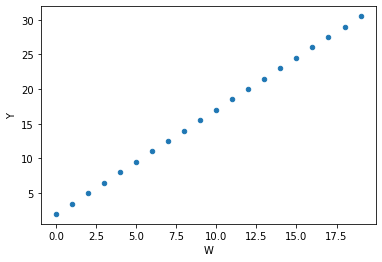

In [32]:
import matplotlib.pyplot as plot
wdf = pd.DataFrame(np.arange(20),columns = ['W'])
wdf['Y'] = wdf['W']*1.5+2
display(wdf)
wdf.plot(kind = 'scatter',x = 'W',y = 'Y')

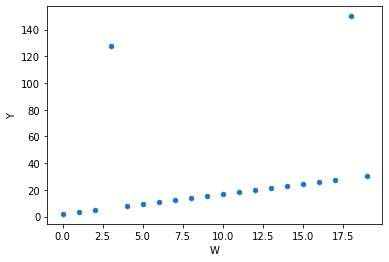

In [33]:
wdf.iloc[3,1] = 128
wdf.iloc[18,1] = 150
wdf.plot(kind = 'scatter',x = 'W',y = 'Y')

**2.箱线图分析**

利用数据中的五个统计量（最小值、下四分位数Q1、中位数Q2、上四分位数Q3和最大值）来描述数据。

它也可以粗略地看出数据是否具有对称性、分布的分散程度等信息。

In [34]:
%%html
<img src = "tables\boxplot.bmp", width = 400, height = 100>

**直观地观察到异常值，如果数据存在离群点，即位于上下边缘区域之外，以圆点的形式表示**

* 当箱型图很短时，意味着很多数据多集中分布在很小的范围内

* 当箱型图很长时，意味着数据分布比较离散，数据间的差异比较大

* 当中位数接近底部时，说明大部分的数据值比较小

* 当中位数接近顶部时，说明大部分的数据值比较大

* 中位数所处的高低位置能反映数据的偏斜程度

* 如果上下虚线比较长，说明上下四分位数之外的数据变化比较大，整体数据的方差和标准偏差也比较大

四分位间距IQR：即 IQR = Q3-Q1

下限：= Q1 – 1.5 *IQR

上限：= Q3 + 1.5 *IQR

下边缘是大于Q1 - 1.5*IQR的最小值；   
上边缘是小于Q3 + 1.5 *IQR的最大值。

【例5-32】利用箱线图分析异常值。

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea06779280>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea06779940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea0676bee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea06782040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea06782340>],
 'means': []}

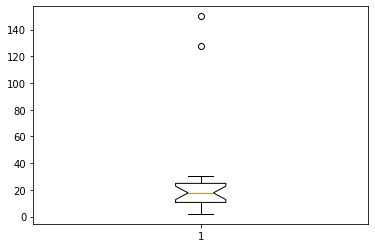

In [36]:
import matplotlib.pyplot as plt
plt.boxplot(wdf['Y'].values,notch = True)
# plt.boxplot?

**3. 3σ法则**

在3σ原则下，异常值被定义为一组测定值中与平均值的偏差超过**3倍标准差**的值。


【例5-33】利用3σ法则检测异常值。

In [38]:
def outRange(S):
    print(S.shape)
    blidx = (S.mean()-3*S.std()>S)|(S.mean()+3*S.std()<S)  
    print(blidx)
    idx = np.arange(S.shape[0])[blidx]   
    print(idx)
    outRange = S.iloc[idx]
#     outRange = S[idx]
    return outRange
outier = outRange(wdf['Y'])
outier

(20,)
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
Name: Y, dtype: bool
[18]


18    150.0
Name: Y, dtype: float64

### 5.3.4 数据转换

**1. 数据值替换**

数据值替换是将查询到的数据替换为指定数据。

在pandas中通过replace进行数据值的替换。

【例5-34】replace替换数据值。

In [40]:
data = {'姓名':['李红','小明','马芳','国志'],
        '性别':['0','1','0','1'],
        '籍贯':['北京','甘肃','','上海']}
df = pd.DataFrame(data)
display(df)

,姓名,性别,籍贯
0,李红,0,北京
1,小明,1,甘肃
2,马芳,0,
3,国志,1,上海


In [41]:
df = df.replace('','不详')
display(df)

,姓名,性别,籍贯
0,李红,0,北京
1,小明,1,甘肃
2,马芳,0,不详
3,国志,1,上海


也可以同时对不同值进行多值替换，参数传入的方式可以是列表，也可以是字典格式。

【例5-35】replace传入列表实现多值替换。

In [43]:
# 第一个列表为被替换的值，第二个列表是对应替换的值。
df = df.replace(['不详','甘肃'],['兰州','兰州'])
display(df)

,姓名,性别,籍贯
0,李红,0,北京
1,小明,1,兰州
2,马芳,0,兰州
3,国志,1,上海


【例5-36】 replace传入字典实现多值替换

In [ ]:
df = df.replace({'1':'男','0':'女'})
print(df)

**2. 利用函数或映射进行数据转换**

在Pandas中可以自定义函数，然后通过map方法实现。

【例5-37】map方法映射数据。

In [58]:
data = {'姓名':['李红','小明','马芳','国志'],
        '性别':['0','1','0','1'],
        '籍贯':['北京','兰州','兰州','上海']}
df = pd.DataFrame(data)
df['成绩'] = [58,86,91,78]
display(df)

,姓名,性别,籍贯,成绩
0,李红,0,北京,58
1,小明,1,兰州,86
2,马芳,0,兰州,91
3,国志,1,上海,78


In [67]:
def grade(x):
    if x>=90:
        return '优'
    elif 70<=x<90:
        return '良'
    elif 60<=x<70:
        return '中'
    else:
        return '差'
df['等级'] = df['成绩'].map(grade)
display(df)

,姓名,性别,籍贯,成绩,等级
0,李红,0,北京,58,差
1,小明,1,兰州,86,良
2,马芳,0,兰州,91,优
3,国志,1,上海,78,良


## 5.4 数据标准化
不同特征之间往往具有不同的量纲，由此造成数值之间的差异。为了消除特征之间量纲和取值范围的差异可能会造成的影响，需要对数据进行标准化处理。

### 5.4.1 离差标准化数据
离差标准化是对原始数据所做的一种线性变换，将原始数据的数值映射到[0,1]区间。转换公式如下所示。

𝑥1=(𝑥−min)  ⁄  (max−min) 

【例5-38】数据的离差标准化。

In [ ]:
def MinMaxScale(data):
    data = (data-data.min())/(data.max()-data.min())
    return data
x = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
print('原始数据为：\n',x)
x_scaled = MinMaxScale(x)
print('标准化后矩阵为:\n',x_scaled,end = '\n')

### 5.4.2 标准差标准化数据

标准差标准化又称**零均值标准化或z分数标准化**，是当前使用最广泛的数据标准化方法。

经过该方法处理的数据均值为0，标准差为1，转换公式如下：

𝑥1=(𝑥−𝑚𝑒𝑎𝑛) ⁄ 𝑠𝑡𝑑

【例5-39】数据的标准差标准化。

In [44]:
def StandardScale(data):
    data = (data-data.mean())/data.std()
    return data
x = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
print('原始数据为：\n',x)
x_scaled = StandardScale(x)
print('标准化后矩阵为:\n',x_scaled,end = '\n')


原始数据为：
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
标准化后矩阵为:
 [[ 0.52128604 -1.35534369  1.4596009 ]
 [ 1.4596009  -0.41702883 -0.41702883]
 [-0.41702883  0.52128604 -1.35534369]]


## 5.5 数据变换与数据离散化
数据分析的预处理除了数据清洗、数据合并和标准化之外，还包括数据变换的过程，如类别型数据变换和连续型数据的离散化。

### 5.5.1 类别型数据的哑变量处理
类别型数据是数据分析中十分常见的特征变量，但是在进行建模时，Python不能像R那样去直接处理**非数值型**的变量，因此需要对这些类别变量进行一系列转换，如哑变量。

哑变量( Dummy Variables)是用以反映质的属性的一个人工变量，是量化了的**质变量**，通常取值为0或1。
利用Pandas库中的get_dummies函数对类别型特征进行哑变量处理。

【例5-40】数据的哑变量处理。

In [74]:
df = pd.DataFrame([  
            ['green', 'M', 10.1, 'class1'],   
            ['red', 'L', 13.5, 'class2'],   
            ['blue', 'XL', 15.3, 'class1']])  
df.columns = ['color', 'size', 'prize','class label']  
display(df)
pd.get_dummies(df) 

,color,size,prize,class label
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


,prize,color_blue,color_green,color_red,size_L,size_M,size_XL,class label_class1,class label_class2
0,10.1,0,1,0,0,1,0,1,0
1,13.5,0,0,1,1,0,0,0,1
2,15.3,1,0,0,0,0,1,1,0


对于一个类别型特征，若取值有m个，则经过哑变量处理后就变成了m个二元互斥特征，每次只有一个激活，使得数据变得稀疏。

### 5.5.2 连续型变量的离散化


数据分析和统计的预处理阶段，经常会遇到年龄、消费等连续型数值，而很多模型算法，尤其是分类算法，都要求数据是离散的，因此要将数值进行离散化分段统计以提高数据区分度。

常用的离散化方法主要有**等宽法、等频法和聚类分析法**。

**1. 等宽法**  

将数据的值阈划分成具有相同宽度的区间，**区间个数**由数据本身的特点决定或由用户指定。

Pandas提供了cut函数，可以进行连续型数据的等宽离散化。

【例5-41】cut方法应用。

In [75]:
# pd.cut?
np.random.seed(666)
score_list = np.random.randint(25, 100, size = 10)
print('原始数据：\n',score_list)

原始数据：
 [27 70 55 87 95 98 55 61 86 76]


In [78]:
bins = [0, 59, 70, 80, 100]
score_cut = pd.cut(score_list, bins)
# 统计每个区间人数
# print(score_cut)
# print(pd.value_counts(score_cut)) 
print(score_cut.value_counts()) 
# 注意统计结果的显示顺序

(0, 59]      3
(59, 70]     2
(70, 80]     1
(80, 100]    4
dtype: int64


In [1]:
# 取消排序
# pd.value_counts?
print(pd.value_counts(score_cut,sort = False)) 

NameError: name 'pd' is not defined

使用等宽法离散化对数据分布具有较高要求，若数据分布不均匀，那么各个类的数目也会变得不均匀。

**2. 等频法**

cut函数虽然不能够直接实现等频离散化，但可以通过定义将相同数量的记录放进每个区间。

【例5-42】等频法离散化连续型数据。

In [79]:
def SameRateCut(data,k):
    # 注意k的值    
    # k = 2
    # 返回data对应的分位数
    w = data.quantile(np.arange(0,1+1.0/k,1.0/k))
    print(w)
    data = pd.cut(data,w)
    return data
result = SameRateCut(pd.Series(score_list),4)
result.value_counts()
# 注意统计的个数

0.00    27.00
0.25    56.50
0.50    73.00
0.75    86.75
1.00    98.00
dtype: float64


(86.75, 98.0]    3
(73.0, 86.75]    2
(56.5, 73.0]     2
(27.0, 56.5]     2
dtype: int64

相比较于等宽法，等频法避免了**类分布不均匀的问题**，但同时也有可能将数值非常相近的两个值分到不同的区间以满足每个区间对数据个数的要求。

**3. 聚类分析法**

一维聚类的方法包括两步，首先将连续型数据用聚类算法进行聚类，然后处理聚类得到的簇，为合并到一个簇的连续型数据做同一标记。


In [28]:
%%html
<img src = "tables\KMeans.bmp", width=600, height=100>

[1 1 1 0 0 0]


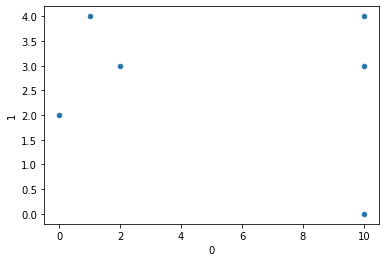

In [98]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
X = np.array([[0, 2], [1, 4], [2, 3],
               [10, 4], [10, 3], [10, 0]])
df = pd.DataFrame(X)
# print(df)
df.plot(kind = 'scatter',x=0,y=1)
kmeans = KMeans(n_clusters=2).fit(X)
print(kmeans.labels_)
# print(kmeans.cluster_centers_)
# kmeans.predict([[0, 0], [12, 3]])